## What to do?
Implementing SVM from scratch for a simple dataset 

In [7]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import tqdm
import pandas as pd

<h3> Importing the datset</h3>

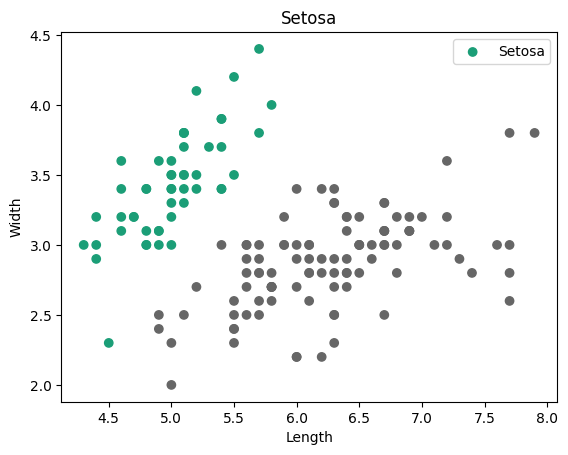

In [10]:
irisData=load_iris()
flowers= pd.DataFrame(data=irisData.data,columns=irisData.feature_names)
flowers['target']=irisData.target

# flowers.describe()
# print(flowers)
# print(flowers['target'])
# for i in flowers['target']:
#     print(i)
# print(irisData)

X = irisData.data[:, :2]
y = irisData.target
y = np.where(y == 0, -1, 1)

plt.scatter(X[:,0],X[:,1],c=y, cmap='Dark2')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Setosa')
plt.legend(["Setosa","Non-Setosa"])
plt.show()

In [14]:
# class SVM:
#     def __init__(self,lr=.001,iters=1000,lambda_=.01):
#         self.lr=lr
#         self.lambda_=lambda_
#         self.n=iters
#         self.w=None
#         self.b=None

#     def fit(self,x_train,y_train):
#      samps,features=x_train.shape
#      yMod=np.where(y<=0,-1,1)
#      self.w=np.zeros(features)
#      self.b=0
#      i=0
#      for _ in range(self.n): #looping
#       for idx,xIdx in enumerate(x_train):
#         check=yMod[idx]*np.dot((self.w,xIdx)-self.b)>=1
#         if check==True:
#          self.w=self.w-self.lr*(2*self.lambda_*self.w)
#         else:
#          self.w=self.w-self.lr*(2*self.lambda_*self.w-np.dot((yMod[idx],xIdx)))
#          self.b=self.b-self.lr*y[idx]
#     #  i=i+1
    
#     def predict(self,x_pred):
#       return np.sign(np.dot(x_pred,self.w)-self.b)
    
# def plotBoundary(x,y_,model):
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
#     ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()    
#     xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
#     xy = np.vstack([xx.ravel(), yy.ravel()]).T
#     Z = model.predict(xy).reshape(xx.shape) 
#     ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
#     plt.show()

In [15]:
class SVM:
    def __init__(self, lr=0.001, lambda_=0.01, n=1000):
        self.lr = lr
        self.lambda_ = lambda_
        self.n = n
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_ * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_ * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


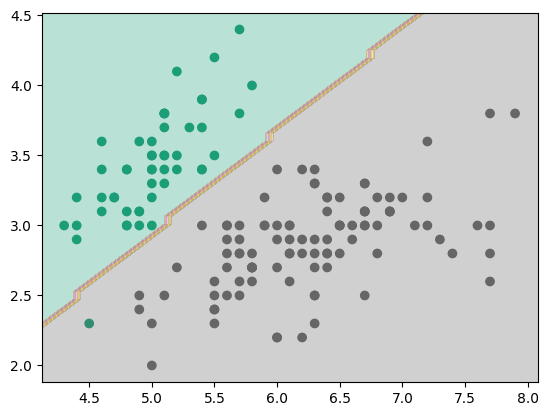

In [6]:
svm = SVM(0.001,0.01,1000)
svm.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:,0],X[:,1],c=y,cmap='Dark2')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='Dark2')
    plt.show()

plot_decision_boundary(X, y, svm)